# Manufacturing Data Science 製造數據科學 - Assignment 2
### R10725013 陳志剛

# Q1 (20%)

# Q1-(a)試簡述何謂維度的詛咒？試列舉一案例說明

# Q1-(b)避免維度詛咒的方法有哪些？

# Q1-(c)試找一個開放數據 (e.g. Kaggle開放數據 或第一次作業紅酒數據集 )並選一種方法 (e.g. 線性迴歸或決策樹 )，用模擬方法 固定樣本數但逐步增加變數個數， 試著重新繪製圖 3.12， 呈現維度與預測 (或分類 )績效間的關係。

# Q2 (20%)

# Q2-(a)試找一個開放數據 (e.g. Kaggle開放數據 )，您會用什麼方法來確認資料品質的好壞?試操作一次並說明其細節

# Q2-(b)公司 或您 是否有現存方法來進行資料品質的確認？如果有(或沒有 )，試依您的角度說明(或建議)確認資料品質的標準作業流程 (i.e. SOP)。

# Q2-(c)試建議三個可能衡量數據品質的量化指標 (i.e. KPIs)。

# Q3 (20%) 在數據科學分析架構中的決策支援階段

# Q3-(a)什麼是模型的適應性與擴充性?

# Q3-(b)在AI專案中(可根據第一題的開放數據與模型)，就您所使用的數據與建構預測模型是否具備適應性與擴充性?為什麼?該如何改善與調整?

# Q4 (10%) 遺漏值填補的方法包括了統計量填補 、預測式與生成式填補

# Q4-(a)試說明這些方法分別適用於什麼樣情形

# Q4-(b)為什麼某特徵存在大量遺漏值不宜直接刪除？

# Q5 (30%) 在 UCI Machine Learning Repository開 放 數據中包含了一個鋼板缺陷數據 (steel plates faults dataset https://archive.ics.uci.edu/ml/datasets/steel+plates+faults)，一共包含了1,941個觀測值，而每個觀測值具有 27個特徵以及作為目標值的7種缺陷。試挑選出凹凸不平(Bumps)以及刮痕(K_Scratch)兩種缺陷進行分析

# Q5-(1)試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。
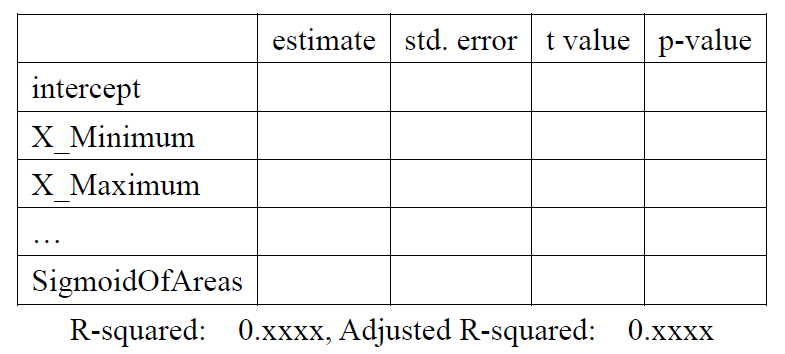

# Q5-(2) 基於上述(a)的 結果，將上述特徵以t-value進行排序後，哪些特徵的迴 歸係數在統計上是顯著的呢(p-value<0.01)?

# Q5-(3) 試問配適一個羅吉斯迴歸模型是否合適？試若配適不佳，試說明其可能的原因為何？

# Q5-(4)試問配適一個線性判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？

# Q5-(5)試問配適一個二次判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？